In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

### Import Data


In [189]:
fileName = 'loan_data.csv'
df = pd.read_csv(fileName)

df[df.notna().sum().sort_values().index].info()

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_14916\1849666050.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fileName)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    0 non-null       float64
 1   desc                         17 non-null      object 
 2   dti_joint                    34001 non-null   float64
 3   annual_inc_joint             34003 non-null   float64
 4   verification_status_joint    34003 non-null   object 
 5   mths_since_last_record       141179 non-null  float64
 6   mths_since_last_major_derog  215105 non-null  float64
 7   mths_since_last_delinq       396633 non-null  float64
 8   next_pymnt_d                 591423 non-null  object 
 9   il_util                      658743 non-null  float64
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  title                        736165 non-null  object 
 13 

In [190]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [191]:
selected_columns = [
    'annual_inc', 'dti', 'revol_util', 'emp_length', 'home_ownership',
    'purpose', 'loan_amnt', 'int_rate', 'installment', 'grade',
    'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'total_acc', 'earliest_cr_line', 'addr_state',
    'term', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'collections_12_mths_ex_med', 'loan_status' 
]

selected_df = df[selected_columns]
selected_df.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status
0,10000.0,21.61,55.1,NaN,OWN,credit_card,2300,12.62,77.08,C,C1,Not Verified,0,1.0,4,0,6,Sep-1985,NY,36 months,382.99,270.09,112.90,0.0,0,Current
1,94000.0,25.61,105.8,10+ years,MORTGAGE,debt_consolidation,16000,12.62,360.95,C,C1,Not Verified,0,0.0,9,0,26,Jun-1992,MA,60 months,2060.09,1186.93,873.16,0.0,0,Current
2,46350.0,8.88,44.9,7 years,MORTGAGE,home_improvement,6025,15.05,209.01,C,C4,Not Verified,0,0.0,11,0,27,Jun-2002,MA,36 months,1032.46,684.18,348.28,0.0,0,Current
3,44000.0,27.06,18.7,10+ years,RENT,car,20400,9.44,652.91,B,B1,Source Verified,0,1.0,15,0,19,Jan-2007,CA,36 months,3237.80,2501.19,736.61,0.0,0,Current
4,85000.0,6.79,88.0,10+ years,MORTGAGE,debt_consolidation,13000,11.99,431.73,B,B5,Source Verified,1,0.0,5,0,24,Feb-2002,MN,36 months,2137.00,1539.34,597.66,0.0,0,Current


### Target Output - Loan Status

In [192]:
selected_df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [193]:
selected_df= selected_df[selected_df['loan_status'] != 'In Grace Period']                                                    # Remove loans in Grace Period
#df['loan_status'] = df['loan_status'].str.replace(pat='Late.*', regex=True, repl='Late')          # Late (15-30 days) ---> Late
selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

selected_df['loan_status'].value_counts() 

loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

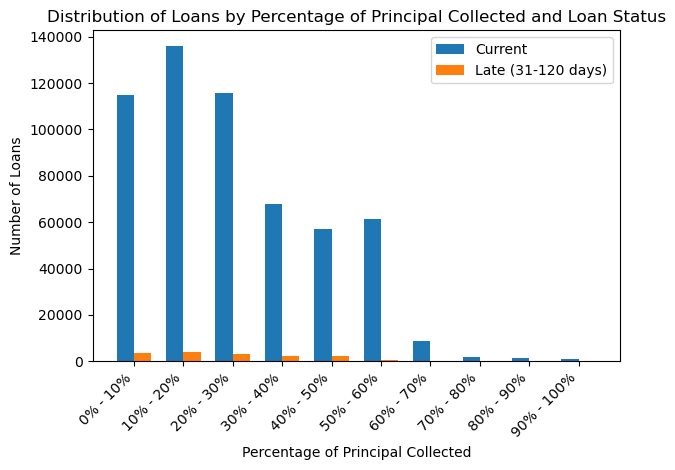

In [194]:
import matplotlib.pyplot as plt
import numpy as np


current_loans = selected_df[selected_df['loan_status'] == 'Current']
late_loans = selected_df[selected_df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['loan_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [195]:
# Calculate the percentage of principal collected for each loan
selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100

# Update the loan status based on the percentage of principal collected
selected_df.loc[(selected_df['loan_status'] == 'Current') & (selected_df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
selected_df.loc[(selected_df['loan_status'] == 'Late (31-120 days)') & (selected_df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

selected_df['loan_status'].value_counts() 

loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [196]:
df_modified = selected_df[~selected_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
df_modified['loan_status'].value_counts() 

loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

In [197]:
df_modified.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,359.26,A,A4,Not Verified,0,0.0,20,1,46,Jul-1994,CA,36 months,11707.816236,11575.0,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,285.70,E,E3,Source Verified,0,0.0,4,0,5,Jan-2000,WA,36 months,7206.461000,7200.0,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,232.79,A,A4,Not Verified,0,2.0,19,0,27,Mar-2013,TX,36 months,7642.289180,7500.0,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,243.29,C,C5,Source Verified,0,0.0,15,2,21,Aug-2006,CA,60 months,10026.700000,10000.0,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,492.34,C,C5,Verified,1,0.0,4,0,10,May-2008,MA,36 months,14375.136851,14000.0,375.14,0.0,0,Fully Paid,100.0


### Remove empty columns and correlated columns

In [198]:
df_numerical_features = df_modified.select_dtypes(include=['number', 'int', 'float'])
df_numerical_features.head()

,annual_inc,dti,revol_util,loan_amnt,int_rate,installment,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,principal_collected_percentage
8,153000.0,16.99,22.7,11575,7.35,359.26,0,0.0,20,1,46,11707.816236,11575.0,132.82,0.0,0,100.0
10,50000.0,6.07,98.9,7200,24.85,285.70,0,0.0,4,0,5,7206.461000,7200.0,6.46,0.0,0,100.0
24,110000.0,13.12,27.2,7500,7.35,232.79,0,2.0,19,0,27,7642.289180,7500.0,142.29,0.0,0,100.0
42,51979.0,10.11,20.0,10000,16.02,243.29,0,0.0,15,2,21,10026.700000,10000.0,26.70,0.0,0,100.0
91,75000.0,10.86,90.0,14000,16.02,492.34,1,0.0,4,0,10,14375.136851,14000.0,375.14,0.0,0,100.0


#### Numerical features

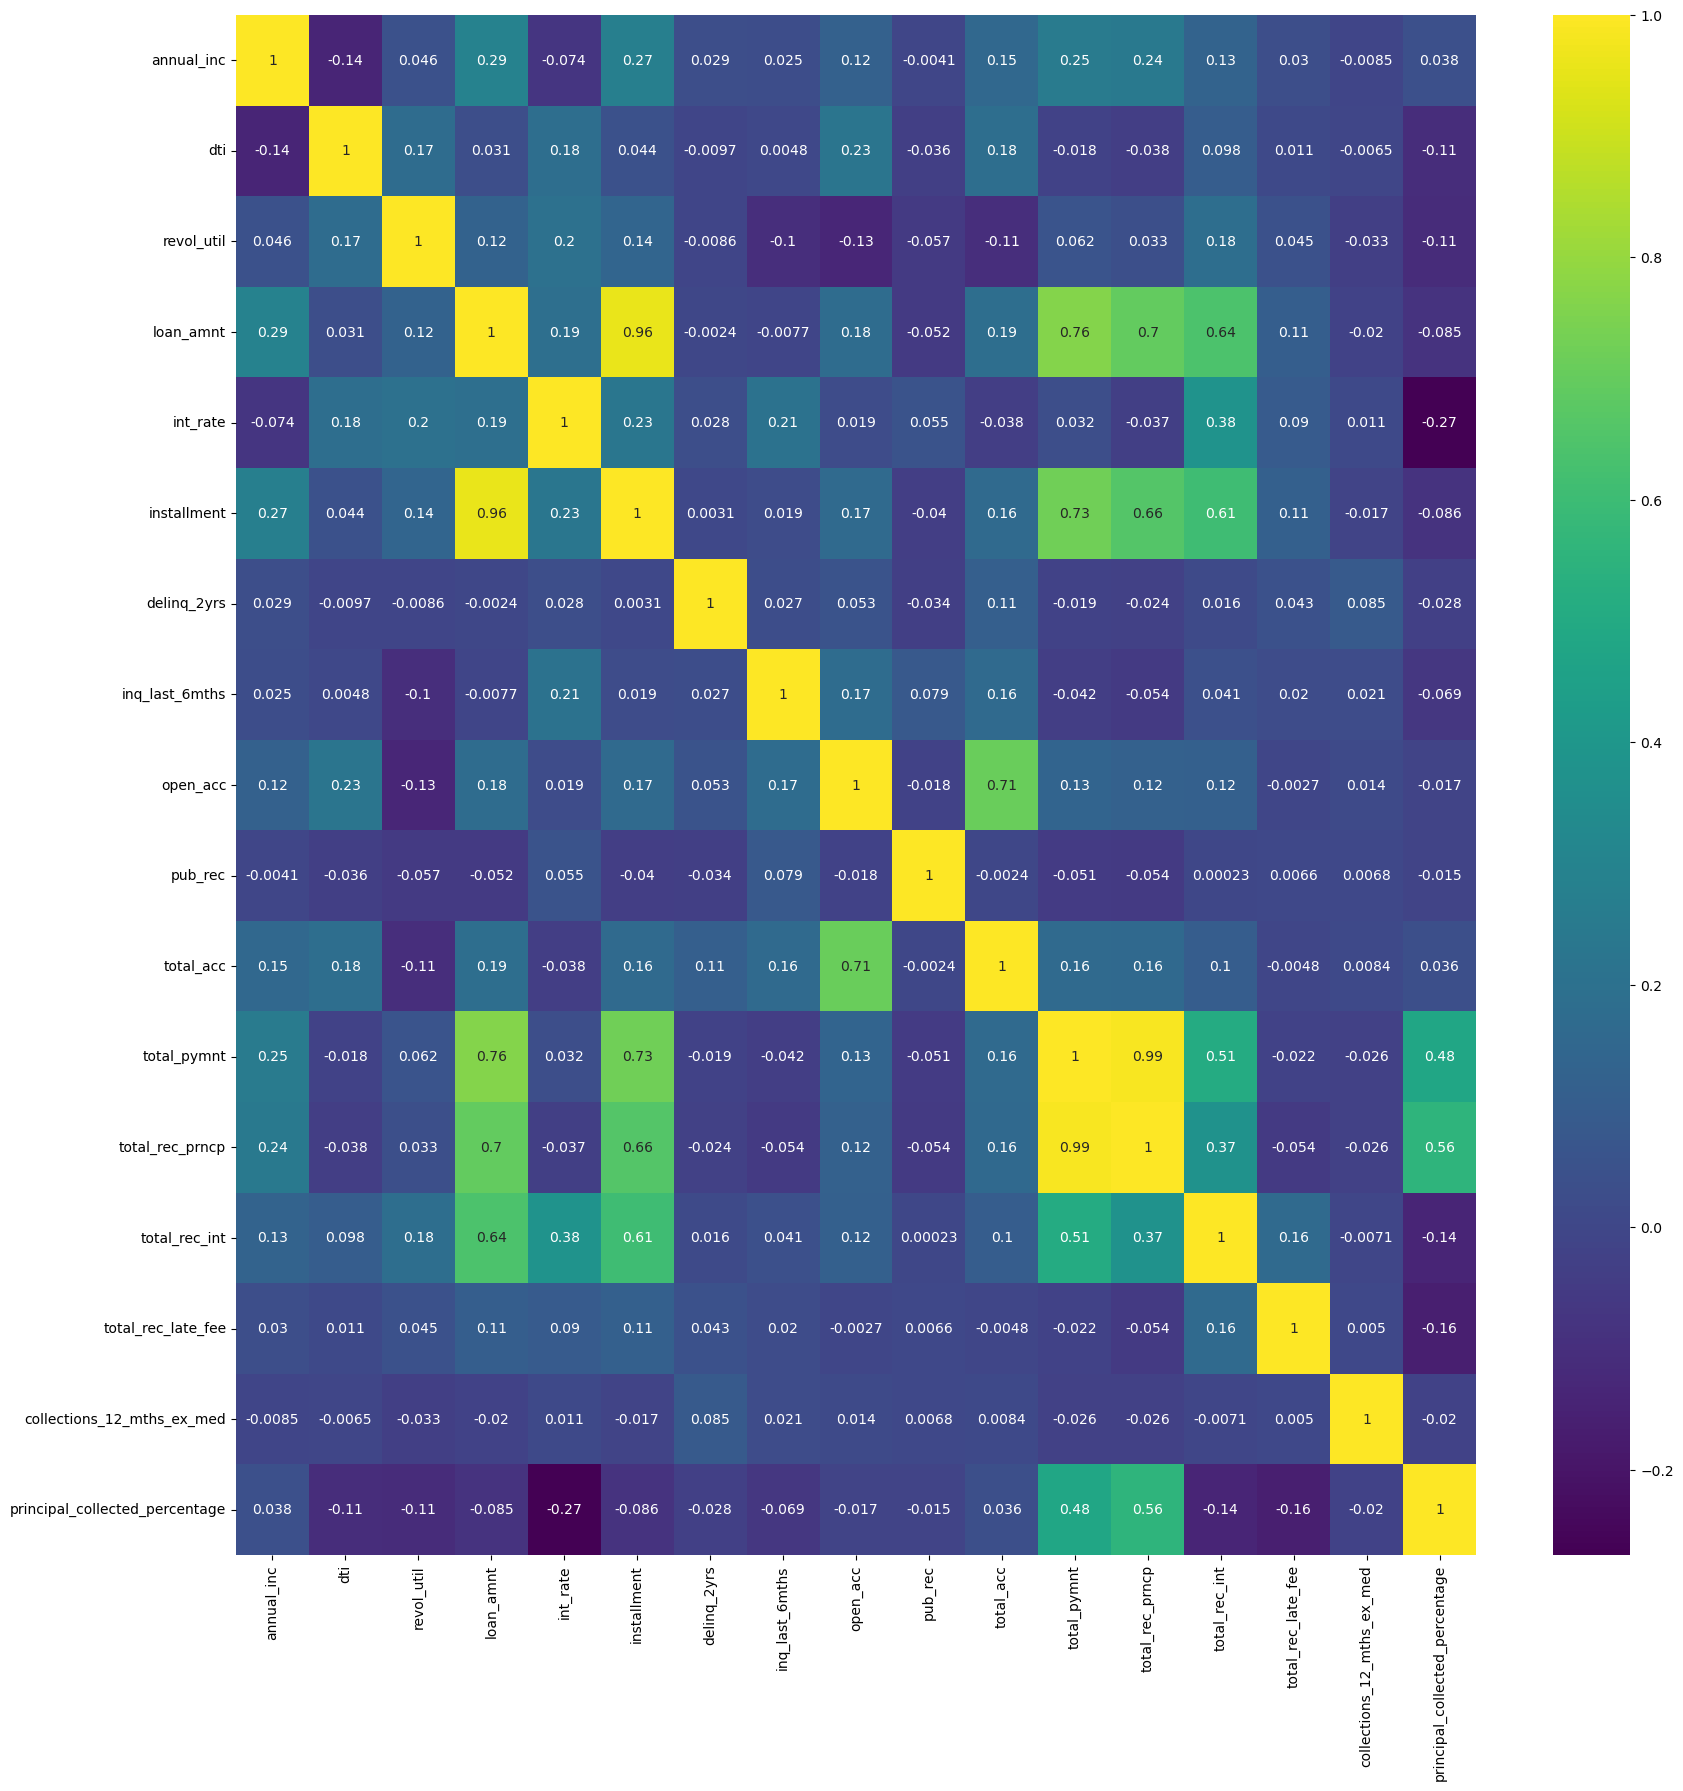

In [199]:
plt.figure(figsize=(20, 20));
sns.heatmap(df_numerical_features.corr(), annot=True, cmap='viridis');

In [200]:
df_modified = df_modified.drop(columns=['total_rec_prncp', 
                           'installment'])

In [201]:
df_modified.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,A,A4,Not Verified,0,0.0,20,1,46,Jul-1994,CA,36 months,11707.816236,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,E,E3,Source Verified,0,0.0,4,0,5,Jan-2000,WA,36 months,7206.461000,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,A,A4,Not Verified,0,2.0,19,0,27,Mar-2013,TX,36 months,7642.289180,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,C,C5,Source Verified,0,0.0,15,2,21,Aug-2006,CA,60 months,10026.700000,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,C,C5,Verified,1,0.0,4,0,10,May-2008,MA,36 months,14375.136851,375.14,0.0,0,Fully Paid,100.0


#### Handling Null values

In [202]:
null_columns = df_modified.columns[df_modified.isnull().any()]
df_modified[null_columns].describe(include='all')

,dti,revol_util,emp_length,inq_last_6mths
count,191475.000000,191381.000000,179277,191514.000000
unique,NaN,NaN,11,NaN
top,NaN,NaN,10+ years,NaN
freq,NaN,NaN,65182,NaN
mean,18.566909,47.740032,NaN,0.635572
std,11.188874,24.735198,NaN,0.918926
min,-1.000000,0.000000,NaN,0.000000
25%,11.900000,28.800000,NaN,0.000000
50%,17.890000,47.000000,NaN,0.000000
75%,24.600000,66.300000,NaN,1.000000


#### Numerical Variables

In [203]:
df_modified.describe()

,annual_inc,dti,revol_util,loan_amnt,int_rate,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,principal_collected_percentage
count,1.915150e+05,191475.000000,191381.000000,191515.000000,191515.000000,191515.00000,191514.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000
mean,7.984813e+04,18.566909,47.740032,14604.011174,13.787241,0.34201,0.635572,11.931541,0.261656,25.423622,12434.565498,1351.423787,1.292128,0.021236,76.797064
std,7.632500e+04,11.188874,24.735198,9114.805202,5.470286,0.92968,0.918926,5.749732,0.653623,12.319893,9837.982116,1460.226132,8.331000,0.164154,36.723835
min,0.000000e+00,-1.000000,0.000000,1000.000000,5.320000,0.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000e+04,11.900000,28.800000,7500.000000,9.750000,0.00000,0.000000,8.000000,0.000000,17.000000,4961.010000,376.310000,0.000000,0.000000,60.127357
50%,6.800000e+04,17.890000,47.000000,12000.000000,12.880000,0.00000,0.000000,11.000000,0.000000,24.000000,9935.580000,878.360000,0.000000,0.000000,100.000000
75%,9.500000e+04,24.600000,66.300000,20000.000000,16.990000,0.00000,1.000000,15.000000,0.000000,32.000000,17380.961238,1808.815000,0.000000,0.000000,100.000000
max,9.550000e+06,999.000000,172.000000,40000.000000,30.990000,21.00000,5.000000,86.000000,46.000000,176.000000,52779.784886,15112.400000,410.600000,12.000000,100.000000


In [204]:
######## dti
null_dti_df = df_modified[df_modified['dti'].isnull()]
null_dti_df['loan_status'].value_counts()

loan_status
Fully Paid     30
Charged Off    10
Name: count, dtype: int64

In [205]:
df_modified['dti'].fillna(df_modified['dti'].mean());    #Fill missing values with mean

In [206]:
########  inq_last_6mths
null_inq_last_6mths_df = df_modified[df_modified['inq_last_6mths'].isnull()]
null_inq_last_6mths_df['loan_status'].value_counts()

loan_status
Fully Paid    1
Name: count, dtype: int64

In [207]:
df_modified['inq_last_6mths'].fillna(0, inplace=True);    #fill missing value with 0

In [208]:
####### revol_util
null_revol_util_df = df_modified[df_modified['revol_util'].isnull()]
print(null_revol_util_df['loan_status'].value_counts())

df_modified['revol_util'].fillna(df_modified['revol_util'].mean());

loan_status
Fully Paid     102
Charged Off     32
Name: count, dtype: int64


#### Categorical variables

In [209]:
print(df_modified.describe(include='object'))
df_modified.head()

       emp_length home_ownership             purpose   grade sub_grade  \
count      179277         191515              191515  191515    191515   
unique         11              5                  12       7        35   
top     10+ years       MORTGAGE  debt_consolidation       C        C1   
freq        65182          95330              109785   56959     12914   

       verification_status earliest_cr_line addr_state       term loan_status  
count               191515           191515     191515     191515      191515  
unique                   3              659         50          2           2  
top        Source Verified         Sep-2004         CA  36 months  Fully Paid  
freq                 77231             1519      28017     146106      143734  


,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,A,A4,Not Verified,0,0.0,20,1,46,Jul-1994,CA,36 months,11707.816236,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,E,E3,Source Verified,0,0.0,4,0,5,Jan-2000,WA,36 months,7206.461000,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,A,A4,Not Verified,0,2.0,19,0,27,Mar-2013,TX,36 months,7642.289180,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,C,C5,Source Verified,0,0.0,15,2,21,Aug-2006,CA,60 months,10026.700000,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,C,C5,Verified,1,0.0,4,0,10,May-2008,MA,36 months,14375.136851,375.14,0.0,0,Fully Paid,100.0


##### Grade and SubGrade

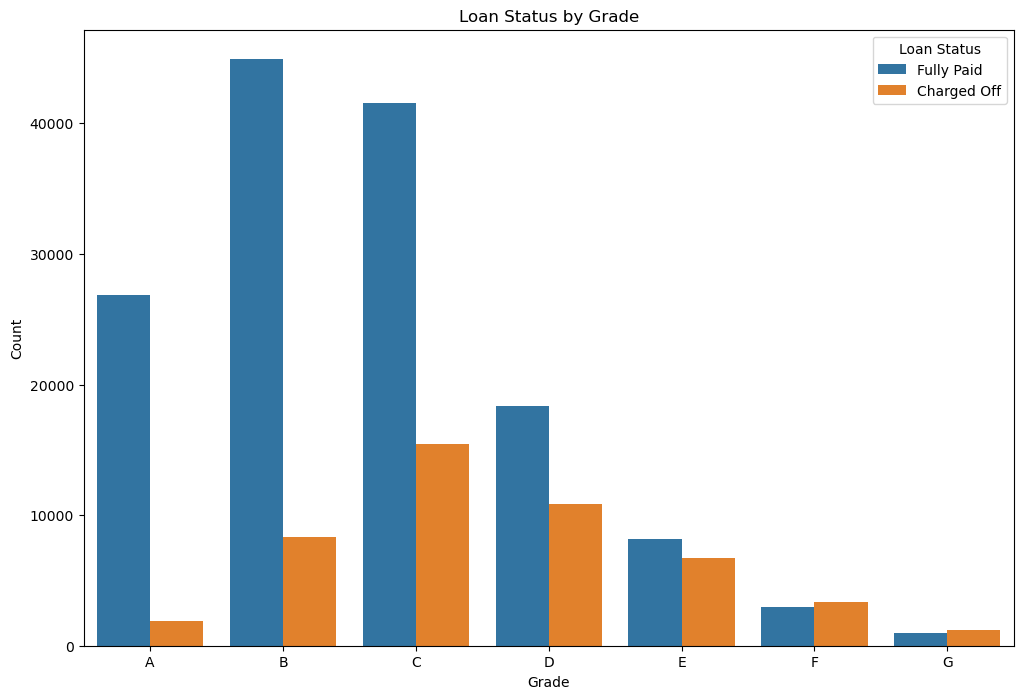

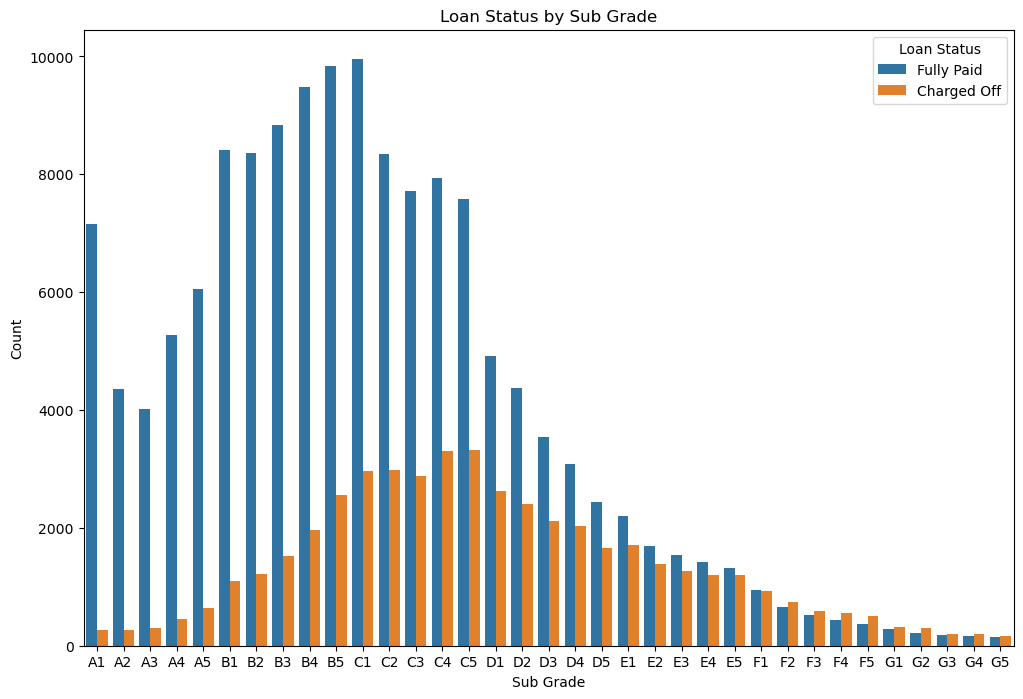

In [210]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade', hue='loan_status', data=df_modified, order=sorted(df_modified['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', hue='loan_status', data=df_modified, order=sorted(df_modified['sub_grade'].unique()))
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [211]:
df_modified = df_modified.drop(columns=['grade']);

##### Home Ownership

In [212]:
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           105
NONE            1
Name: count, dtype: int64

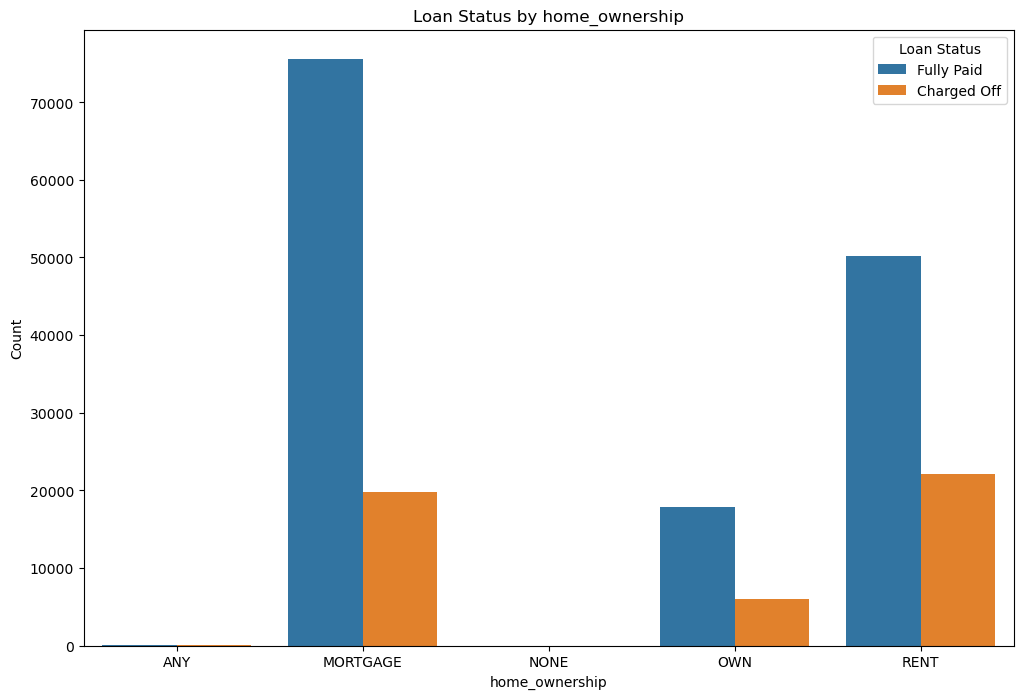

In [213]:
plt.figure(figsize=(12,8))
sns.countplot(x='home_ownership', hue='loan_status', data=df_modified, order=sorted(df_modified['home_ownership'].unique()))
plt.title('Loan Status by home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

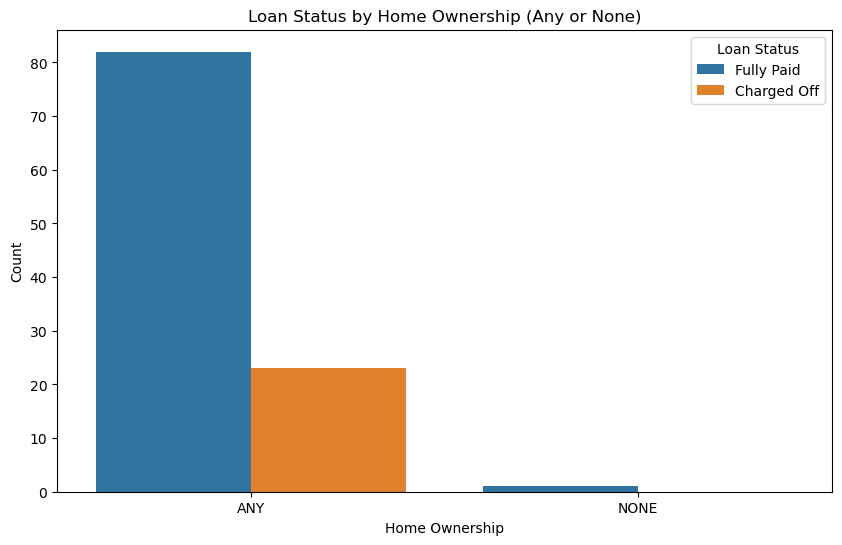

In [214]:
# Filter the DataFrame for rows where home_ownership is 'any' or 'none'
filtered_df = df_modified[df_modified['home_ownership'].isin(['ANY', 'NONE'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=filtered_df)
plt.title('Loan Status by Home Ownership (Any or None)')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [215]:
df_modified.loc[df_modified['home_ownership'] == 'NONE', 'home_ownership'] = 'ANY'
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           106
Name: count, dtype: int64

##### Purpose

In [216]:
df_modified['purpose'].value_counts()

purpose
debt_consolidation    109785
credit_card            37169
home_improvement       14683
other                  13199
major_purchase          5009
medical                 2628
car                     2255
small_business          2126
moving                  1697
vacation                1612
house                   1200
renewable_energy         152
Name: count, dtype: int64

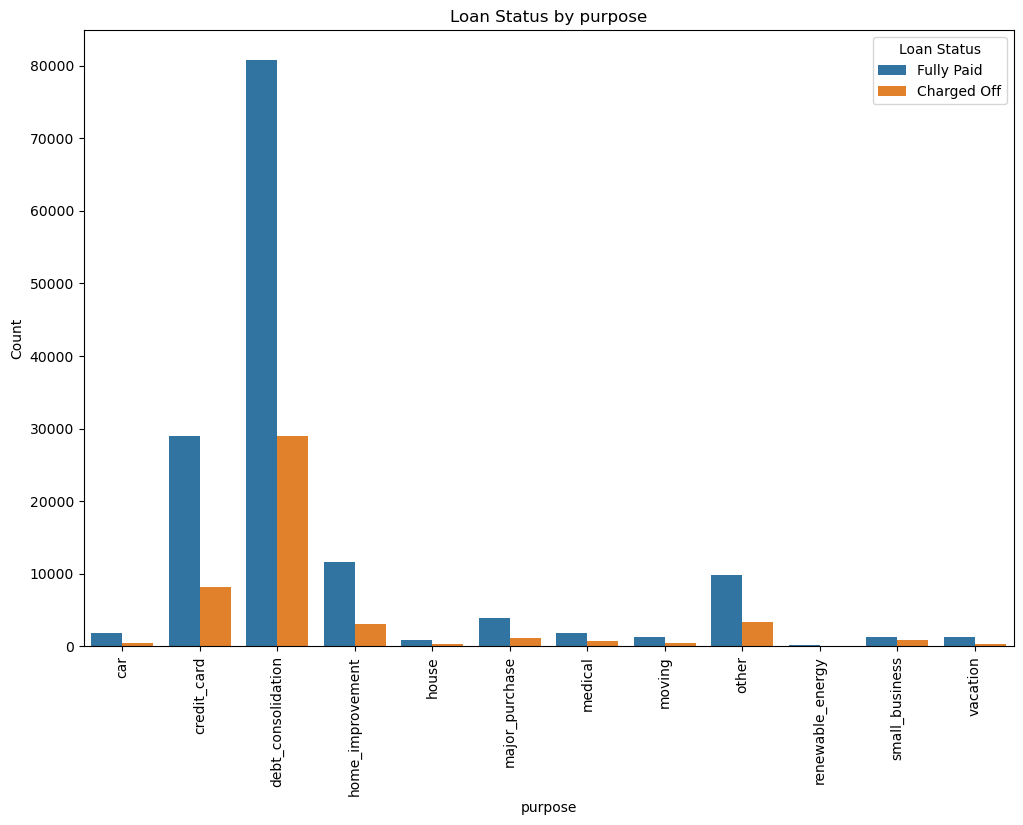

In [217]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='loan_status', data=df_modified, order=sorted(df_modified['purpose'].unique()))
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Verification Status

In [218]:
df_modified['verification_status'].value_counts()

verification_status
Source Verified    77231
Not Verified       57301
Verified           56983
Name: count, dtype: int64

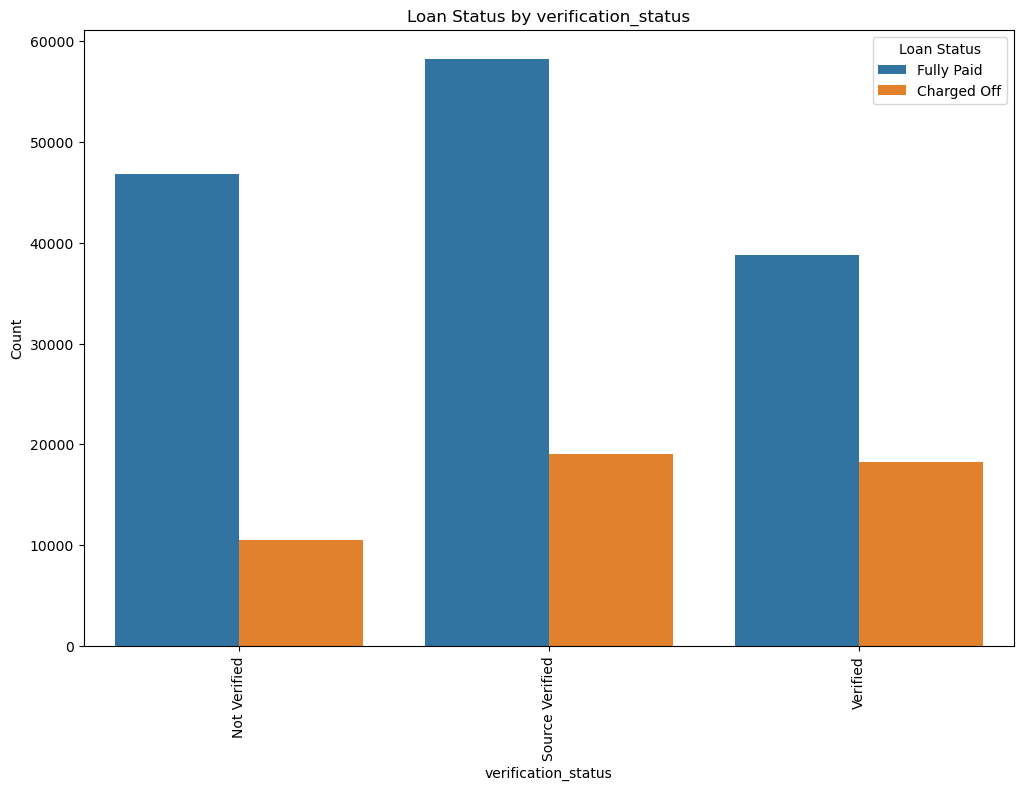

In [219]:
plt.figure(figsize=(12,8))
sns.countplot(x='verification_status', hue='loan_status', data=df_modified, order=sorted(df_modified['verification_status'].unique()))
plt.title('Loan Status by verification_status')
plt.xlabel('verification_status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Employment Length

emp_length
10+ years    65182
2 years      17570
3 years      15483
< 1 year     14739
1 year       13072
5 years      11808
4 years      11301
6 years       8160
8 years       7971
9 years       7602
7 years       6389
Name: count, dtype: int64
--------------------------------

loan_status
Fully Paid     8194
Charged Off    4044
Name: count, dtype: int64


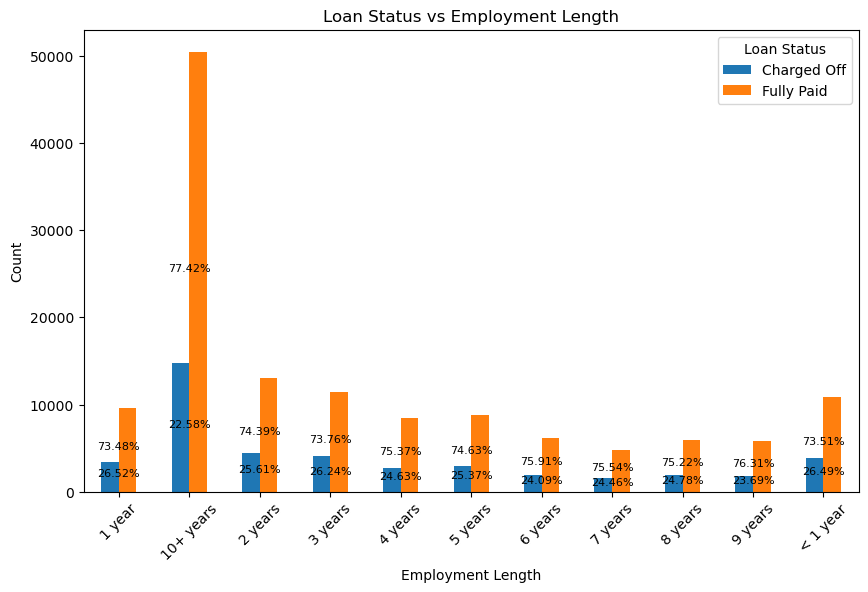

In [220]:
print(df_modified['emp_length'].value_counts())
print('--------------------------------\n')

null_emp_length_df = df_modified[df_modified['emp_length'].isnull()]
print(null_emp_length_df['loan_status'].value_counts())

grouped = df_modified.groupby(['emp_length', 'loan_status']).size().unstack();
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')


for col in grouped.columns:
    for i, val in enumerate(grouped.index):
        total_counts = grouped.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

In [221]:
df_modified = df_modified.drop(columns='emp_length');

##### earliest cr line

In [222]:
df_modified['earliest_cr_line'].value_counts()

earliest_cr_line
Sep-2004    1519
Aug-2003    1469
Aug-2004    1462
Sep-2003    1458
Sep-2005    1419
            ... 
Nov-1959       1
Dec-1959       1
Aug-1958       1
Dec-1963       1
Oct-1962       1
Name: count, Length: 659, dtype: int64

In [223]:
df_modified.loc[:, 'earliest_cr_line'] = pd.to_datetime(df_modified['earliest_cr_line'], format='%b-%Y').dt.year

<Figure size 1200x800 with 0 Axes>

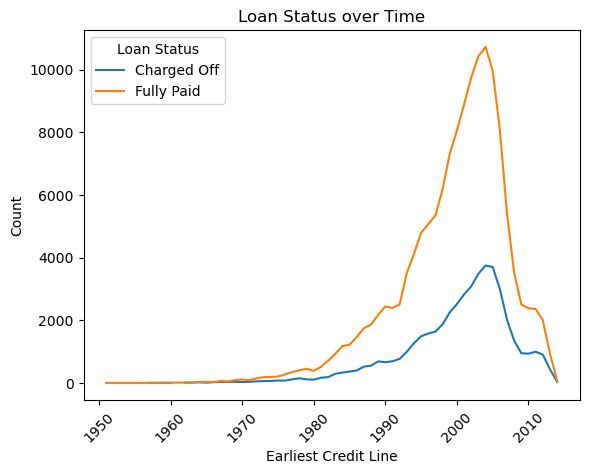

In [224]:
grouped = df_modified.groupby(['earliest_cr_line', 'loan_status']).size().unstack()

# Plot
plt.figure(figsize=(12, 8))
grouped.plot(kind='line')
plt.title('Loan Status over Time')
plt.xlabel('Earliest Credit Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

##### Address State

In [225]:
df_modified['addr_state'].unique()


array(['CA', 'WA', 'TX', 'MA', 'NJ', 'FL', 'NY', 'CT', 'MT', 'MN', 'WI',
       'AR', 'MI', 'VA', 'GA', 'DC', 'MD', 'MS', 'PA', 'MO', 'SC', 'NV',
       'OH', 'CO', 'LA', 'HI', 'NM', 'IN', 'AZ', 'TN', 'IL', 'KY', 'OR',
       'ME', 'NC', 'OK', 'ND', 'RI', 'ID', 'AL', 'SD', 'UT', 'NH', 'KS',
       'NE', 'VT', 'DE', 'AK', 'WY', 'WV'], dtype=object)

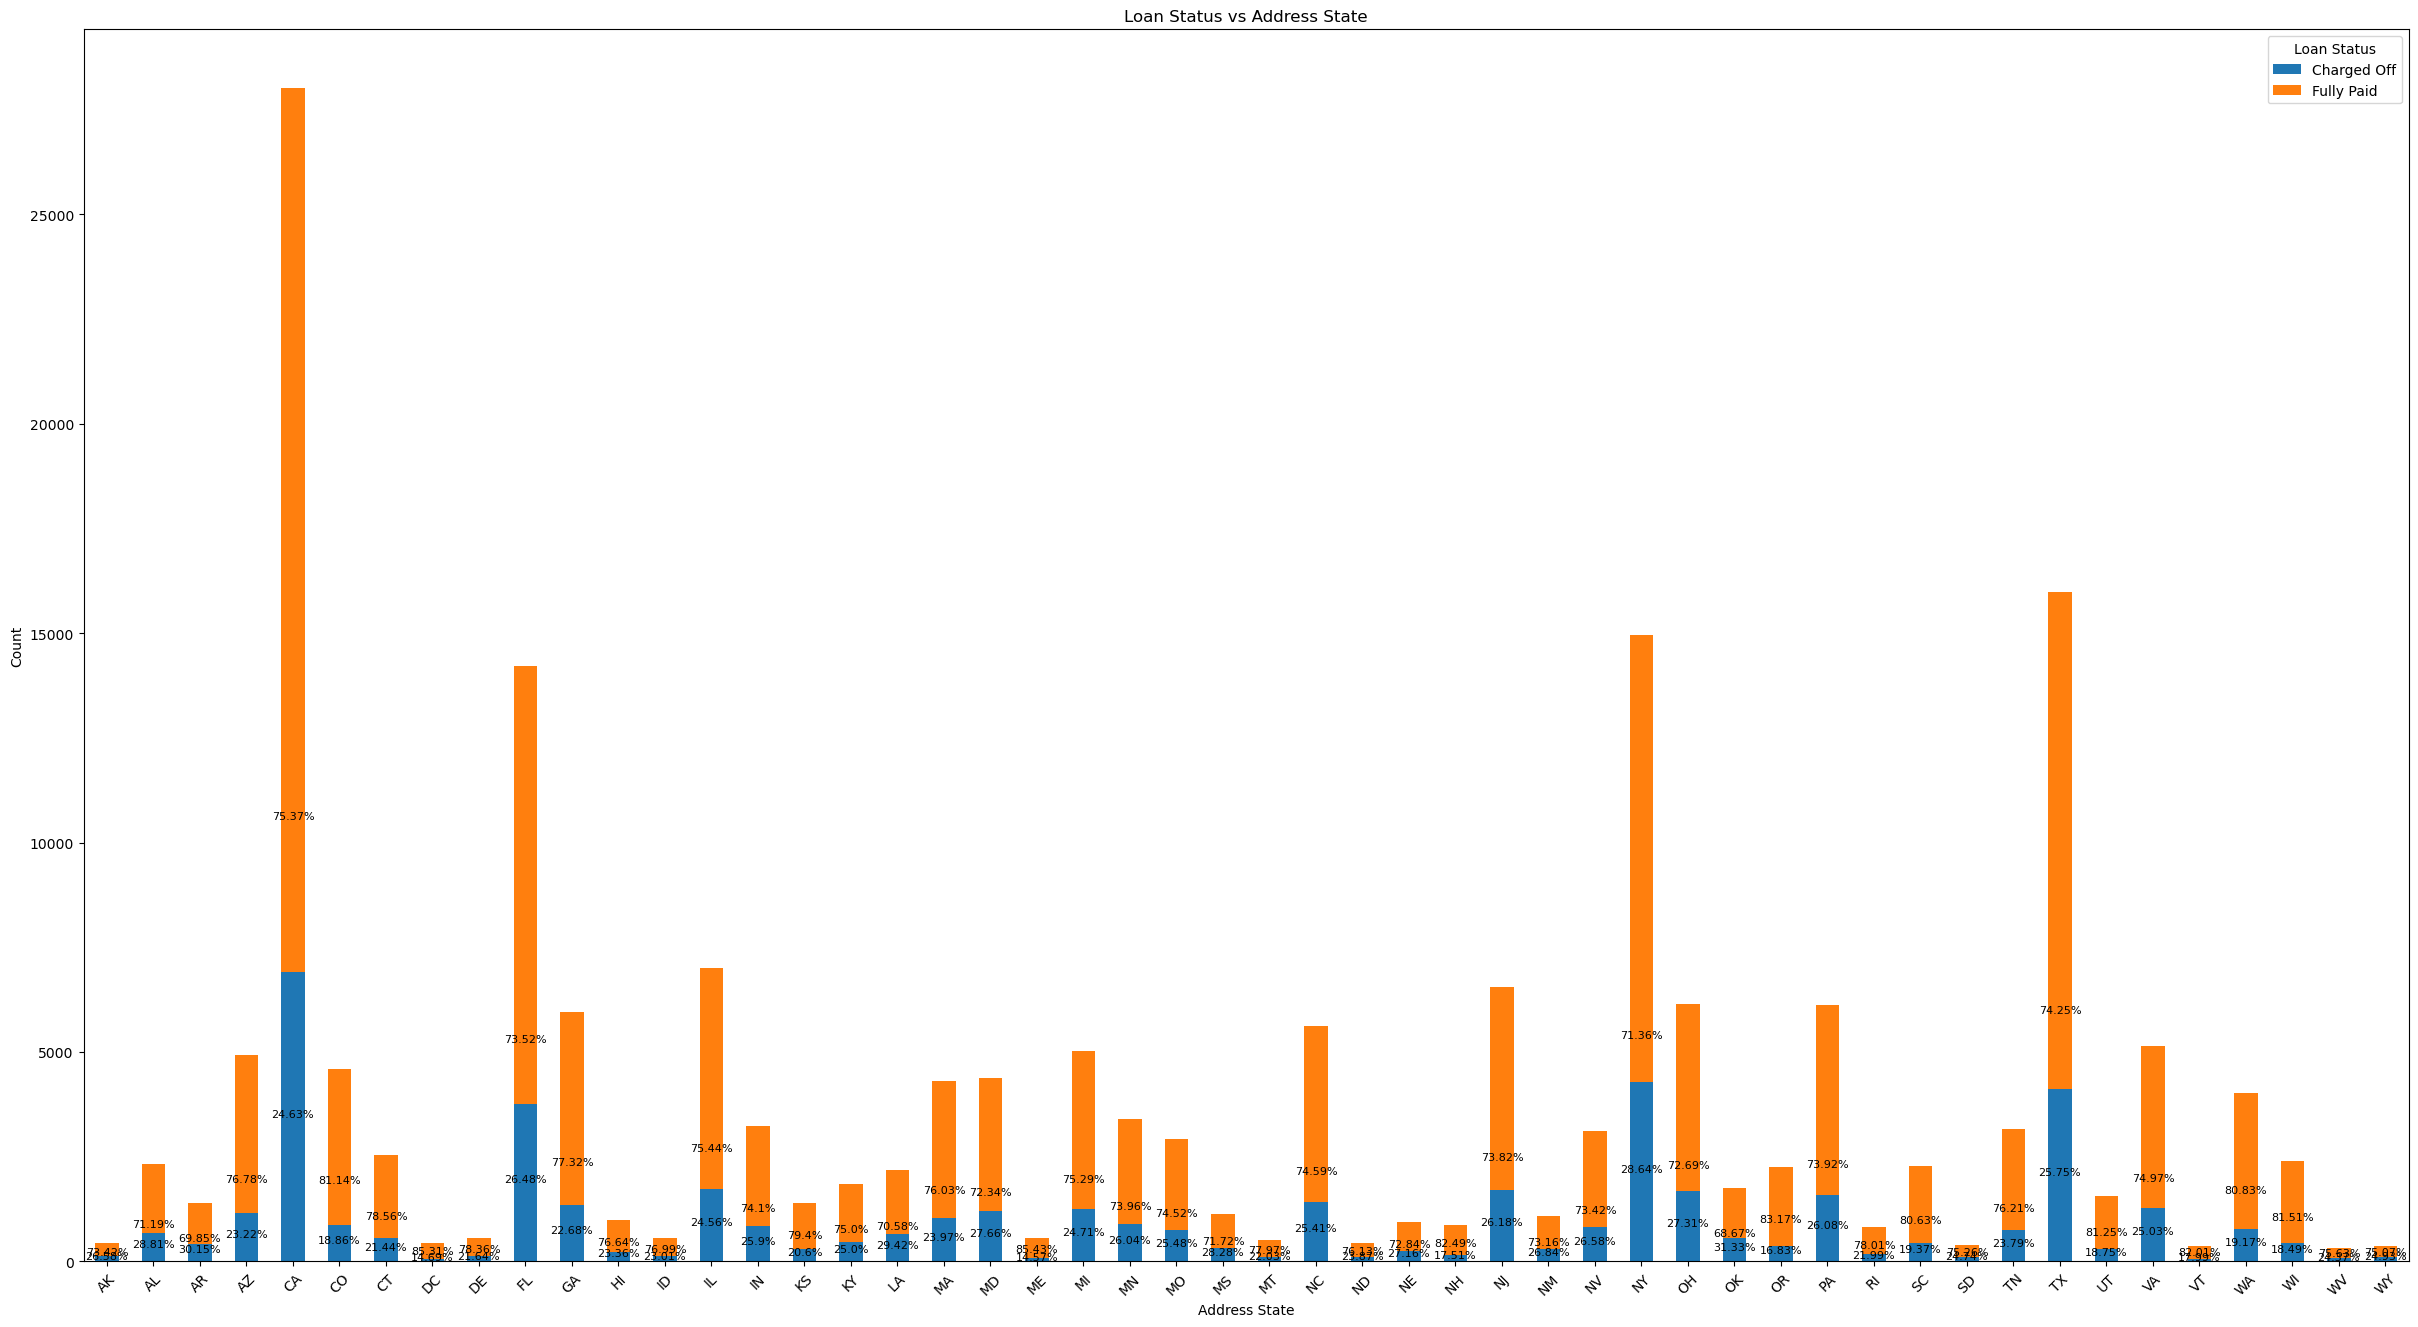

In [226]:
# Group by addr_state and loan_status
grouped_state = df_modified.groupby(['addr_state', 'loan_status']).size().unstack()

# Plot
plt.figure(figsize=(30, 16))
grouped_state.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Loan Status vs Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

# Calculate and display the percentage of loan status in every address state
for col in grouped_state.columns:
    for i, val in enumerate(grouped_state.index):
        total_counts = grouped_state.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped_state.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped_state.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

##### Term

In [227]:
df_modified['term'].value_counts()

term
36 months    146106
60 months     45409
Name: count, dtype: int64

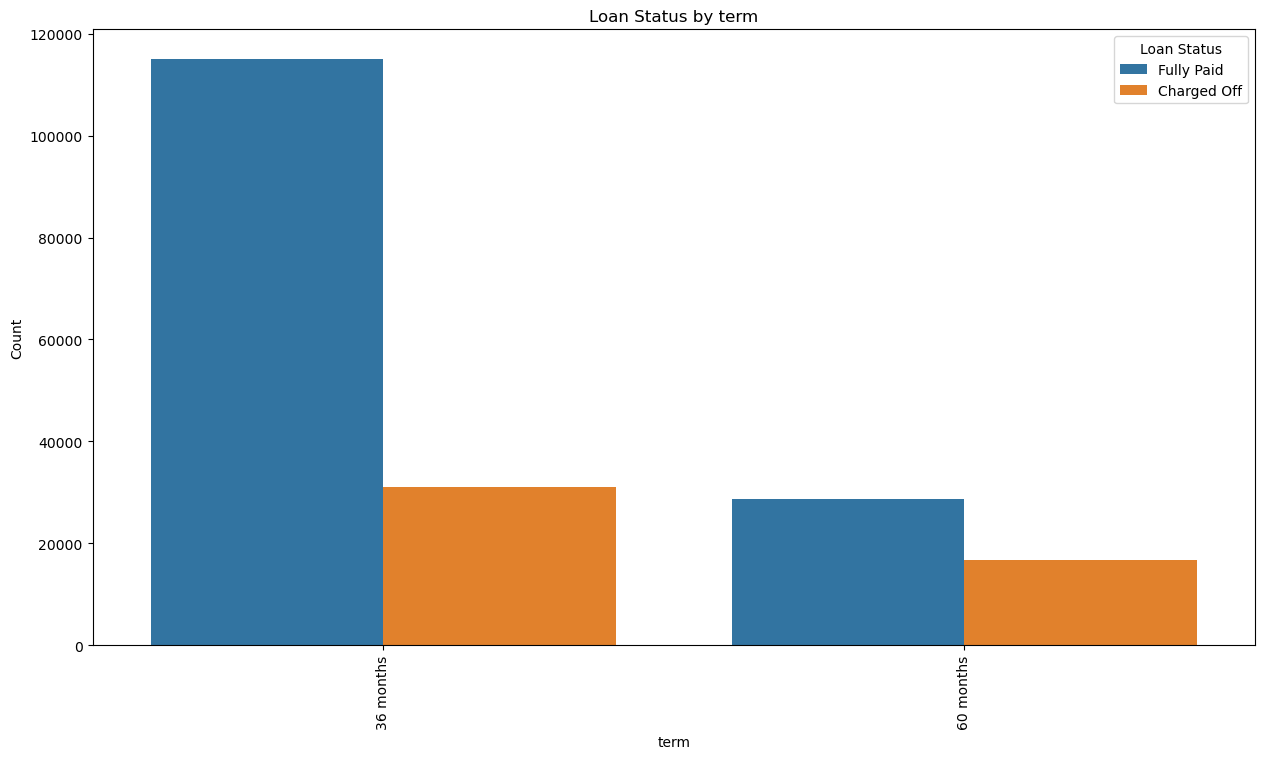

In [228]:
plt.figure(figsize=(15,8))
sns.countplot(x='term', hue='loan_status', data=df_modified, order=sorted(df_modified['term'].unique()))
plt.title('Loan Status by term')
plt.xlabel('term')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### Encoding Categorical variables

In [229]:
df_modified.describe(include='object')

,home_ownership,purpose,sub_grade,verification_status,earliest_cr_line,addr_state,term,loan_status
count,191515,191515,191515,191515,191515,191515,191515,191515
unique,4,12,35,3,63,50,2,2
top,MORTGAGE,debt_consolidation,C1,Source Verified,2004,CA,36 months,Fully Paid
freq,95330,109785,12914,77231,14476,28017,146106,143734


##### Ranking Categorical variables

###### sub_grade

In [230]:
sub_grades = df_modified['sub_grade'].unique();
print(sub_grades)

encoder = OrdinalEncoder(categories=[sub_grades])

encoded_sub_grades = encoder.fit_transform(df_modified[['sub_grade']])
print(encoded_sub_grades)

df_modified['encoded_sub_grade'] = encoded_sub_grades
df_modified.describe(include='all')

['A4' 'E3' 'C5' 'G1' 'B5' 'D2' 'B4' 'B3' 'B1' 'C4' 'D5' 'B2' 'C2' 'D4'
 'E2' 'A1' 'E1' 'E4' 'C3' 'E5' 'D1' 'G3' 'A3' 'C1' 'A5' 'D3' 'F3' 'F5'
 'A2' 'G2' 'F2' 'G4' 'F4' 'G5' 'F1']
[[ 0.]
 [ 1.]
 [ 0.]
 ...
 [11.]
 [24.]
 [11.]]


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade
count,1.915150e+05,191475.000000,191381.000000,191515,191515,191515.000000,191515.000000,191515,191515,191515.00000,191515.000000,191515.000000,191515.000000,191515.000000,191515.0,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000
unique,NaN,NaN,NaN,4,12,NaN,NaN,35,3,NaN,NaN,NaN,NaN,NaN,63.0,50,2,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,MORTGAGE,debt_consolidation,NaN,NaN,C1,Source Verified,NaN,NaN,NaN,NaN,NaN,2004.0,CA,36 months,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN
freq,NaN,NaN,NaN,95330,109785,NaN,NaN,12914,77231,NaN,NaN,NaN,NaN,NaN,14476.0,28017,146106,NaN,NaN,NaN,NaN,143734,NaN,NaN
mean,7.984813e+04,18.566909,47.740032,NaN,NaN,14604.011174,13.787241,NaN,NaN,0.34201,0.635569,11.931541,0.261656,25.423622,NaN,NaN,NaN,12434.565498,1351.423787,1.292128,0.021236,NaN,76.797064,12.975495
std,7.632500e+04,11.188874,24.735198,NaN,NaN,9114.805202,5.470286,NaN,NaN,0.92968,0.918925,5.749732,0.653623,12.319893,NaN,NaN,NaN,9837.982116,1460.226132,8.331000,0.164154,NaN,36.723835,8.272129
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,1000.000000,5.320000,NaN,NaN,0.00000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,4.900000e+04,11.900000,28.800000,NaN,NaN,7500.000000,9.750000,NaN,NaN,0.00000,0.000000,8.000000,0.000000,17.000000,NaN,NaN,NaN,4961.010000,376.310000,0.000000,0.000000,NaN,60.127357,6.000000
50%,6.800000e+04,17.890000,47.000000,NaN,NaN,12000.000000,12.880000,NaN,NaN,0.00000,0.000000,11.000000,0.000000,24.000000,NaN,NaN,NaN,9935.580000,878.360000,0.000000,0.000000,NaN,100.000000,12.000000
75%,9.500000e+04,24.600000,66.300000,NaN,NaN,20000.000000,16.990000,NaN,NaN,0.00000,1.000000,15.000000,0.000000,32.000000,NaN,NaN,NaN,17380.961238,1808.815000,0.000000,0.000000,NaN,100.000000,20.000000


##### Nominal categorical variables


###### home_ownership

In [231]:
ownership_types = df_modified['home_ownership'].unique()
print(ownership_types)
print('----------------\n')
print(df_modified['home_ownership'].value_counts())

one_hot_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = one_hot_encoder.fit_transform(df_modified[['home_ownership']])

# Create column names for the one-hot encoded columns
column_names = one_hot_encoder.get_feature_names_out(['home_ownership'])

# Create a DataFrame from the one-hot encoded array
one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_names)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_home_ownership = pd.concat([df_modified, one_hot_df], axis=1)

df_encoded_home_ownership.describe(include='all')


['OWN' 'RENT' 'MORTGAGE' 'ANY']
----------------

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           106
Name: count, dtype: int64


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
count,1.915150e+05,191475.000000,191381.000000,191515,191515,191515.000000,191515.000000,191515,191515,191515.00000,191515.000000,191515.000000,191515.000000,191515.000000,191515.0,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000
unique,NaN,NaN,NaN,4,12,NaN,NaN,35,3,NaN,NaN,NaN,NaN,NaN,63.0,50,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,MORTGAGE,debt_consolidation,NaN,NaN,C1,Source Verified,NaN,NaN,NaN,NaN,NaN,2004.0,CA,36 months,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,95330,109785,NaN,NaN,12914,77231,NaN,NaN,NaN,NaN,NaN,14476.0,28017,146106,NaN,NaN,NaN,NaN,143734,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.984813e+04,18.566909,47.740032,NaN,NaN,14604.011174,13.787241,NaN,NaN,0.34201,0.635569,11.931541,0.261656,25.423622,NaN,NaN,NaN,12434.565498,1351.423787,1.292128,0.021236,NaN,76.797064,12.975495,0.000553,0.497768,0.124465,0.377213
std,7.632500e+04,11.188874,24.735198,NaN,NaN,9114.805202,5.470286,NaN,NaN,0.92968,0.918925,5.749732,0.653623,12.319893,NaN,NaN,NaN,9837.982116,1460.226132,8.331000,0.164154,NaN,36.723835,8.272129,0.023520,0.499996,0.330113,0.484690
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,1000.000000,5.320000,NaN,NaN,0.00000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000e+04,11.900000,28.800000,NaN,NaN,7500.000000,9.750000,NaN,NaN,0.00000,0.000000,8.000000,0.000000,17.000000,NaN,NaN,NaN,4961.010000,376.310000,0.000000,0.000000,NaN,60.127357,6.000000,0.000000,0.000000,0.000000,0.000000
50%,6.800000e+04,17.890000,47.000000,NaN,NaN,12000.000000,12.880000,NaN,NaN,0.00000,0.000000,11.000000,0.000000,24.000000,NaN,NaN,NaN,9935.580000,878.360000,0.000000,0.000000,NaN,100.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,9.500000e+04,24.600000,66.300000,NaN,NaN,20000.000000,16.990000,NaN,NaN,0.00000,1.000000,15.000000,0.000000,32.000000,NaN,NaN,NaN,17380.961238,1808.815000,0.000000,0.000000,NaN,100.000000,20.000000,0.000000,1.000000,0.000000,1.000000


###### Purpose

In [232]:
purposes = df_modified['purpose'].unique()
print(purposes)
print('----------------\n')
print(df_modified['purpose'].value_counts())

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df_modified[['purpose']])

# Create column names for the one-hot encoded columns
column_names = one_hot_encoder.get_feature_names_out(['purpose'])

# Create a DataFrame from the one-hot encoded array
one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_names)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_purpose = pd.concat([df_encoded_home_ownership, one_hot_df], axis=1)

df_encoded_purpose.describe(include='all')

['credit_card' 'debt_consolidation' 'home_improvement' 'other' 'medical'
 'major_purchase' 'moving' 'car' 'vacation' 'small_business' 'house'
 'renewable_energy']
----------------

purpose
debt_consolidation    109785
credit_card            37169
home_improvement       14683
other                  13199
major_purchase          5009
medical                 2628
car                     2255
small_business          2126
moving                  1697
vacation                1612
house                   1200
renewable_energy         152
Name: count, dtype: int64


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
count,1.915150e+05,191475.000000,191381.000000,191515,191515,191515.000000,191515.000000,191515,191515,191515.00000,191515.000000,191515.000000,191515.000000,191515.000000,191515.0,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000
unique,NaN,NaN,NaN,4,12,NaN,NaN,35,3,NaN,NaN,NaN,NaN,NaN,63.0,50,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,MORTGAGE,debt_consolidation,NaN,NaN,C1,Source Verified,NaN,NaN,NaN,NaN,NaN,2004.0,CA,36 months,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,95330,109785,NaN,NaN,12914,77231,NaN,NaN,NaN,NaN,NaN,14476.0,28017,146106,NaN,NaN,NaN,NaN,143734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.984813e+04,18.566909,47.740032,NaN,NaN,14604.011174,13.787241,NaN,NaN,0.34201,0.635569,11.931541,0.261656,25.423622,NaN,NaN,NaN,12434.565498,1351.423787,1.292128,0.021236,NaN,76.797064,12.975495,0.000553,0.497768,0.124465,0.377213,0.011775,0.194079,0.573245,0.076668,0.006266,0.026155,0.013722,0.008861,0.068919,0.000794,0.011101,0.008417
std,7.632500e+04,11.188874,24.735198,NaN,NaN,9114.805202,5.470286,NaN,NaN,0.92968,0.918925,5.749732,0.653623,12.319893,NaN,NaN,NaN,9837.982116,1460.226132,8.331000,0.164154,NaN,36.723835,8.272129,0.023520,0.499996,0.330113,0.484690,0.107870,0.395491,0.494607,0.266064,0.078909,0.159595,0.116335,0.093715,0.253317,0.028161,0.104775,0.091358
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,1000.000000,5.320000,NaN,NaN,0.00000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000e+04,11.900000,28.800000,NaN,NaN,7500.000000,9.750000,NaN,NaN,0.00000,0.000000,8.000000,0.000000,17.000000,NaN,NaN,NaN,4961.010000,376.310000,0.000000,0.000000,NaN,60.127357,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.800000e+04,17.890000,47.000000,NaN,NaN,12000.000000,12.880000,NaN,NaN,0.00000,0.000000,11.000000,0.000000,24.000000,NaN,NaN,NaN,9935.580000,878.360000,0.000000,0.000000,NaN,100.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.500000e+04,24.600000,66.300000,NaN,NaN,20000.000000,16.990000,NaN,NaN,0.00000,1.000000,15.000000,0.000000,32.000000,NaN,NaN,NaN,17380.961238,1808.815000,0.000000,0.000000,NaN,100.000000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###### verification_status

In [233]:
verification_statuses = df_modified['verification_status'].unique()
print(verification_statuses)
print('----------------\n')
print(df_modified['verification_status'].value_counts())

one_hot_encoded = one_hot_encoder.fit_transform(df_modified[['verification_status']])

# Create column names for the one-hot encoded columns
column_names = one_hot_encoder.get_feature_names_out(['verification_status'])

# Create a DataFrame from the one-hot encoded array
one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_names)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_verification_status = pd.concat([df_encoded_purpose, one_hot_df], axis=1)

df_encoded_verification_status.describe(include='all')

df_encoded_verification_status.describe(include='all')

['Not Verified' 'Source Verified' 'Verified']
----------------

verification_status
Source Verified    77231
Not Verified       57301
Verified           56983
Name: count, dtype: int64


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
count,1.915150e+05,191475.000000,191381.000000,191515,191515,191515.000000,191515.000000,191515,191515,191515.00000,191515.000000,191515.000000,191515.000000,191515.000000,191515.0,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000
unique,NaN,NaN,NaN,4,12,NaN,NaN,35,3,NaN,NaN,NaN,NaN,NaN,63.0,50,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,MORTGAGE,debt_consolidation,NaN,NaN,C1,Source Verified,NaN,NaN,NaN,NaN,NaN,2004.0,CA,36 months,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,95330,109785,NaN,NaN,12914,77231,NaN,NaN,NaN,NaN,NaN,14476.0,28017,146106,NaN,NaN,NaN,NaN,143734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.984813e+04,18.566909,47.740032,NaN,NaN,14604.011174,13.787241,NaN,NaN,0.34201,0.635569,11.931541,0.261656,25.423622,NaN,NaN,NaN,12434.565498,1351.423787,1.292128,0.021236,NaN,76.797064,12.975495,0.000553,0.497768,0.124465,0.377213,0.011775,0.194079,0.573245,0.076668,0.006266,0.026155,0.013722,0.008861,0.068919,0.000794,0.011101,0.008417,0.299198,0.403263,0.297538
std,7.632500e+04,11.188874,24.735198,NaN,NaN,9114.805202,5.470286,NaN,NaN,0.92968,0.918925,5.749732,0.653623,12.319893,NaN,NaN,NaN,9837.982116,1460.226132,8.331000,0.164154,NaN,36.723835,8.272129,0.023520,0.499996,0.330113,0.484690,0.107870,0.395491,0.494607,0.266064,0.078909,0.159595,0.116335,0.093715,0.253317,0.028161,0.104775,0.091358,0.457908,0.490554,0.457176
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,1000.000000,5.320000,NaN,NaN,0.00000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000e+04,11.900000,28.800000,NaN,NaN,7500.000000,9.750000,NaN,NaN,0.00000,0.000000,8.000000,0.000000,17.000000,NaN,NaN,NaN,4961.010000,376.310000,0.000000,0.000000,NaN,60.127357,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.800000e+04,17.890000,47.000000,NaN,NaN,12000.000000,12.880000,NaN,NaN,0.00000,0.000000,11.000000,0.000000,24.000000,NaN,NaN,NaN,9935.580000,878.360000,0.000000,0.000000,NaN,100.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.500000e+04,24.600000,66.300000,NaN,NaN,20000.000000,16.990000,NaN,NaN,0.00000,1.000000,15.000000,0.000000,32.000000,NaN,NaN,NaN,17380.961238,1808.815000,0.000000,0.000000,NaN,100.000000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.

###### addr_state

In [138]:
states_to_encode = df_modified['addr_state'].value_counts()[df_modified['addr_state'].value_counts() > 4000].index

# Filter the DataFrame to include only the states to encode
df_filtered = df_modified[df_modified['addr_state'].isin(states_to_encode)]

df_filtered.drop_duplicates(inplace=True)

# Initialize and fit OneHotEncoder
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df_filtered[['addr_state']])

# Get column names for the one-hot encoded columns
column_names = encoder.get_feature_names_out(['addr_state'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_names)

df_encoded_addr_state = pd.concat([df_encoded_verification_status, one_hot_df], axis=1)
df_encoded_addr_state.fillna(0, inplace=True)

print(df_encoded_addr_state.describe(include='all'))

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_14916\4241080524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


          annual_inc            dti     revol_util  home_ownership   purpose  \
count   3.553620e+05  355362.000000  355362.000000        355362.0  355362.0   
unique           NaN            NaN            NaN             5.0      13.0   
top              NaN            NaN            NaN             0.0       0.0   
freq             NaN            NaN            NaN        163847.0  163847.0   
mean    4.303250e+04      10.004161      25.710501             NaN       NaN   
std     6.872992e+04      12.374091      29.931480             NaN       NaN   
min     0.000000e+00      -1.000000       0.000000             NaN       NaN   
25%     0.000000e+00       0.000000       0.000000             NaN       NaN   
50%     3.200000e+04       6.030000      10.950000             NaN       NaN   
75%     7.000000e+04      18.770000      49.600000             NaN       NaN   
max     9.550000e+06     999.000000     172.000000             NaN       NaN   

            loan_amnt       int_rate  s

###### term

In [139]:
term_types = df_modified['term'].unique()
print(term_types)
print('----------------\n')
print(df_modified['term'].value_counts())

one_hot_encoded = one_hot_encoder.fit_transform(df_modified[['term']])

# Create column names for the one-hot encoded columns
column_names = one_hot_encoder.get_feature_names_out(['term'])

# Create a DataFrame from the one-hot encoded array
one_hot_df = pd.DataFrame(one_hot_encoded, columns=column_names)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_term = pd.concat([df_encoded_addr_state, one_hot_df], axis=1)

df_encoded_term.describe(include='all')

df_encoded_term.describe(include='all')

['36 months' '60 months']
----------------

term
36 months    146106
60 months     45409
Name: count, dtype: int64


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_NC,addr_state_NJ,addr_state_NY,addr_state_OH,addr_state_PA,addr_state_TX,addr_state_VA,addr_state_WA,term_36 months,term_60 months
count,3.553620e+05,355362.000000,355362.000000,355362.0,355362.0,355362.000000,355362.000000,355362.0,355362.0,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.0,355362.0,355362.000000,355362.000000,355362.000000,355362.000000,355362.0,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.00000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,355362.000000,191515.000000,191515.000000
unique,NaN,NaN,NaN,5.0,13.0,NaN,NaN,36.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,163847.0,163847.0,NaN,NaN,163847.0,163847.0,NaN,NaN,NaN,NaN,NaN,NaN,163847.0,163847.0,NaN,NaN,NaN,NaN,163847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.303250e+04,10.004161,25.710501,NaN,NaN,7870.529770,7.430348,NaN,NaN,0.184319,0.342527,6.430257,0.141014,13.701535,1077.705422,NaN,NaN,6701.351893,728.321898,0.696366,0.011445,NaN,41.388189,6.992875,0.000298,0.268262,0.067078,0.203291,0.006346,0.104595,0.308938,0.041318,0.003377,0.014095,0.007395,0.004775,0.037142,0.000428,0.005983,0.004536,0.161247,0.21733,0.160352,0.013879,0.078841,0.012894,0.040032,0.016763,0.019693,0.012148,0.012300,0.014143,0.015815,0.018446,0.042064,0.017270,0.017208,0.044951,0.014458,0.011332,0.762896,0.237104
std,6.872992e+04,12.374091,29.931480,NaN,NaN,9887.880415,7.959959,NaN,NaN,0.703465,0.745291,7.293244,0.497247,15.569503,996.839428,NaN,NaN,9517.406113,1266.078544,6.149754,0.120972,NaN,46.822359,8.872072,0.017268,0.443055,0.250158,0.402448,0.079407,0.306031,0.462056,0.199026,0.058012,0.117885,0.085677,0.068939,0.189111,0.020677,0.077116,0.067199,0.367759,0.41243,0.366933,0.116988,0.269490,0.112817,0.196036,0.128383,0.138942,0.109547,0.110222,0.118082,0.124759,0.134558,0.200736,0.130275,0.130045,0.207198,0.119371,0.105848,0.425308,0.425308
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

##### Remove additional Columns

In [140]:
# Remove encoded columns
df_all_encoded = df_encoded_term.drop(columns=['home_ownership', 'purpose', 'verification_status',
                                                'addr_state', 'term', 'sub_grade'])

print(df_all_encoded.describe(include='all'))

          annual_inc            dti     revol_util      loan_amnt  \
count   3.553620e+05  355362.000000  355362.000000  355362.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    4.303250e+04      10.004161      25.710501    7870.529770   
std     6.872992e+04      12.374091      29.931480    9887.880415   
min     0.000000e+00      -1.000000       0.000000       0.000000   
25%     0.000000e+00       0.000000       0.000000       0.000000   
50%     3.200000e+04       6.030000      10.950000    3650.000000   
75%     7.000000e+04      18.770000      49.600000   14000.000000   
max     9.550000e+06     999.000000     172.000000   40000.000000   

             int_rate    delinq_2yrs  inq_last_6mths       open_acc  \
count   355362.000000  355362.000000   355362.000000  355362.000000   
unique            NaN        

In [141]:
# Remove dummy variable trap
df_all_encoded = df_encoded_term.drop(columns=['term_60 months', 'addr_state_WA', 'verification_status_Verified',
                                                'purpose_renewable_energy', 'home_ownership_ANY'])